Source:https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Adidas US Sales Datasets.xlsx'
df = pd.read_excel(file_path)

In [3]:
# Display the first few rows and the structure of the dataset
print(df.head(),end="\n\n")
print(df.info())

   Unnamed: 0   Unnamed: 1             Unnamed: 2           Unnamed: 3  \
0         NaN          NaN  Adidas Sales Database                  NaN   
1         NaN          NaN                    NaN                  NaN   
2         NaN          NaN                    NaN                  NaN   
3         NaN     Retailer            Retailer ID         Invoice Date   
4         NaN  Foot Locker                1185732  2020-01-01 00:00:00   

  Unnamed: 4 Unnamed: 5 Unnamed: 6             Unnamed: 7      Unnamed: 8  \
0        NaN        NaN        NaN                    NaN             NaN   
1        NaN        NaN        NaN                    NaN             NaN   
2        NaN        NaN        NaN                    NaN             NaN   
3     Region      State       City                Product  Price per Unit   
4  Northeast   New York   New York  Men's Street Footwear              50   

   Unnamed: 9  Unnamed: 10       Unnamed: 11       Unnamed: 12   Unnamed: 13  
0         NaN

In [4]:
#Setappropriatecolumnnamesandcleanthedata
df.columns= df.iloc[3]
df =df.iloc[4:, 1:].reset_index(drop=True)

In [6]:
# Convert 'Invoice Date' column to datetime format and extract year, month, day columns
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['year'] = df['Invoice Date'].dt.year
df['month'] = df['Invoice Date'].dt.month
df['day'] = df['Invoice Date'].dt.day

In [7]:
 #Display basic informationandstatisticsaboutthedata
print(df.info(),end='\n\n')
# Display the first few rows of the cleaned dataset
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   object        
 8   Units Sold        9648 non-null   object        
 9   Total Sales       9648 non-null   object        
 10  Operating Profit  9648 non-null   object        
 11  Operating Margin  9648 non-null   object        
 12  Sales Method      9648 non-null   object        
 13  year              9648 non-null   int32         
 14  month             9648 n

In [19]:
# Define a color palette as a list of hex color codes
color_palette = [
	"#001219", "#005f73", "#0a9396", "#94d2bd", "#e9d8a6",
	"#ee9b00", "#ca6702", "#bb3e03", "#ae2012", "#9b2226"
]

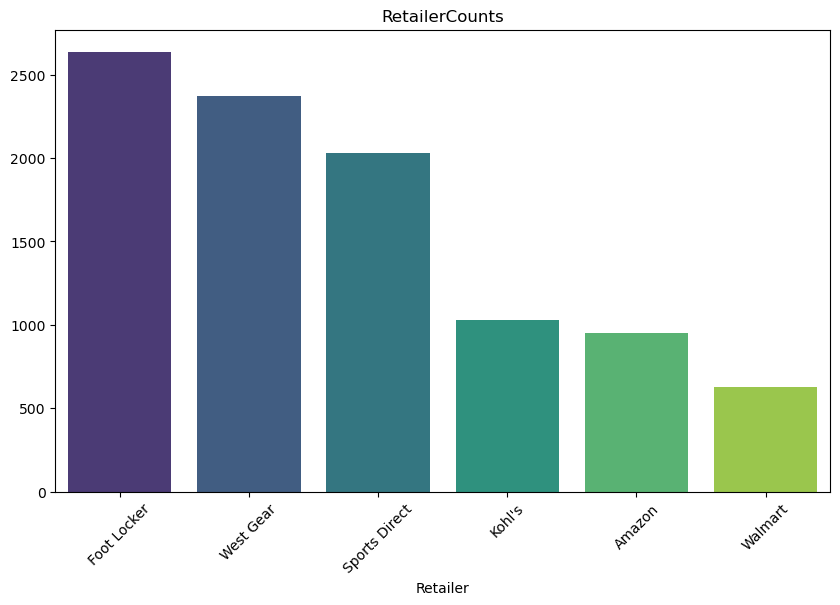

In [8]:
#Analysisandvisualizationofretailercounts
retailer_counts= df['Retailer'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=retailer_counts.index,y=retailer_counts.values,hue=retailer_counts.index,dodge=False,palette='viridis')
plt.title('RetailerCounts')
plt.xticks(rotation=45)
plt.show()

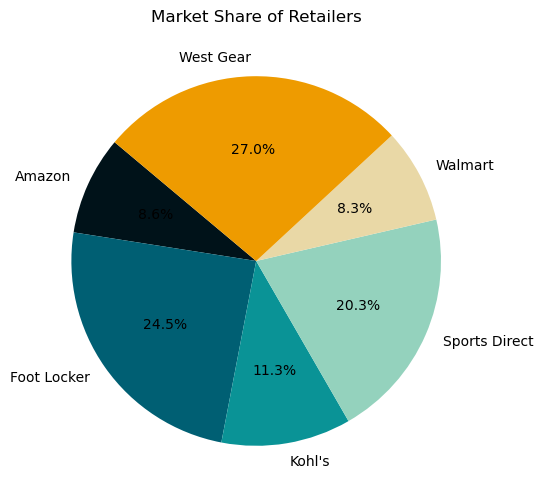

In [21]:
# Analysis and visualization of retailer market share
retailer_sales = df.groupby('Retailer')['Total Sales'].sum()
total_sales = retailer_sales.sum()
market_share = retailer_sales / total_sales
plt.figure(figsize=(10, 6))
market_share.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=color_palette)
plt.title('Market Share of Retailers')
plt.ylabel('')
plt.show()

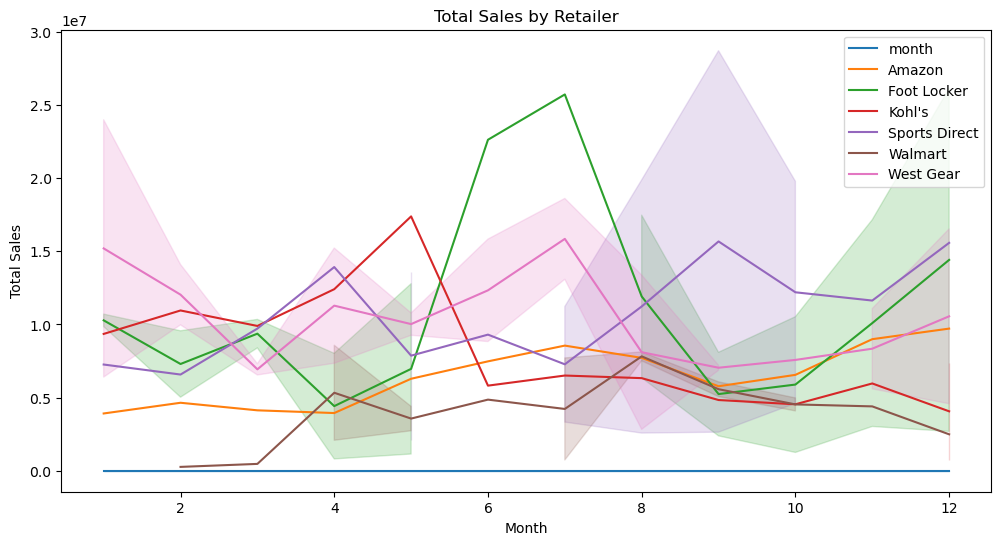

In [10]:
# Total sales by retailer on an annual and monthly basis
retailer_sales = df.groupby(['Retailer', 'year', 'month'])['Total Sales'].sum().unstack(level=0).reset_index()
plt.figure(figsize=(12, 6))
for retailer in retailer_sales.columns[1:]:
    sns.lineplot(data=retailer_sales, x='month', y=retailer, label=retailer)
plt.title('Total Sales by Retailer')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

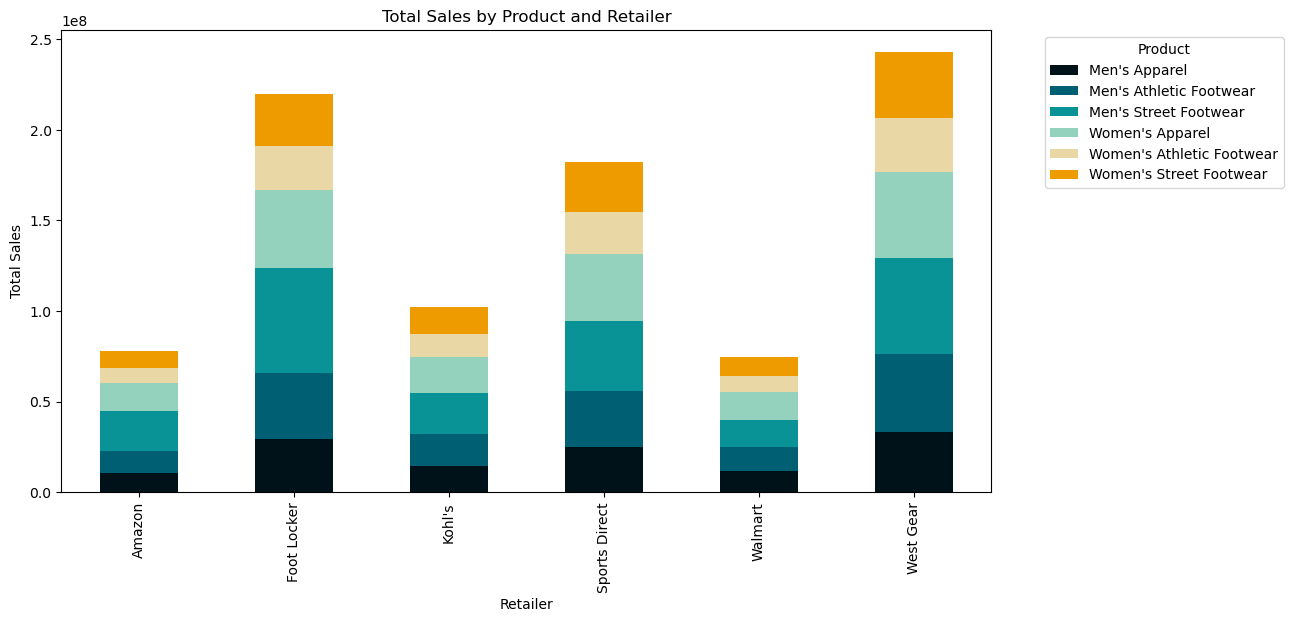

In [23]:
# Total sales by product and retailer
product_sales = df.groupby(['Retailer', 'Product'])['Total Sales'].sum().unstack(level=1)
ax = product_sales.plot(kind='bar', stacked=True, figsize=(12, 6), color=color_palette)
ax.set_title('Total Sales by Product and Retailer')
ax.set_xlabel('Retailer')
ax.set_ylabel('Total Sales')
ax.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

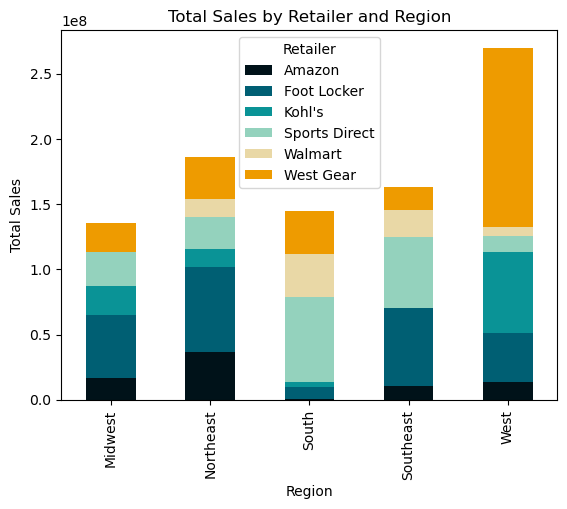

In [24]:
# Total sales by retailer and region
retailer_sales_by_region = df.groupby(['Retailer', 'Region'])['Total Sales'].sum().unstack(level=0)
plt.figure(figsize=(12, 6))
retailer_sales_by_region.plot(kind='bar', stacked=True, color=color_palette)
plt.title('Total Sales by Retailer and Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Retailer')
plt.show()

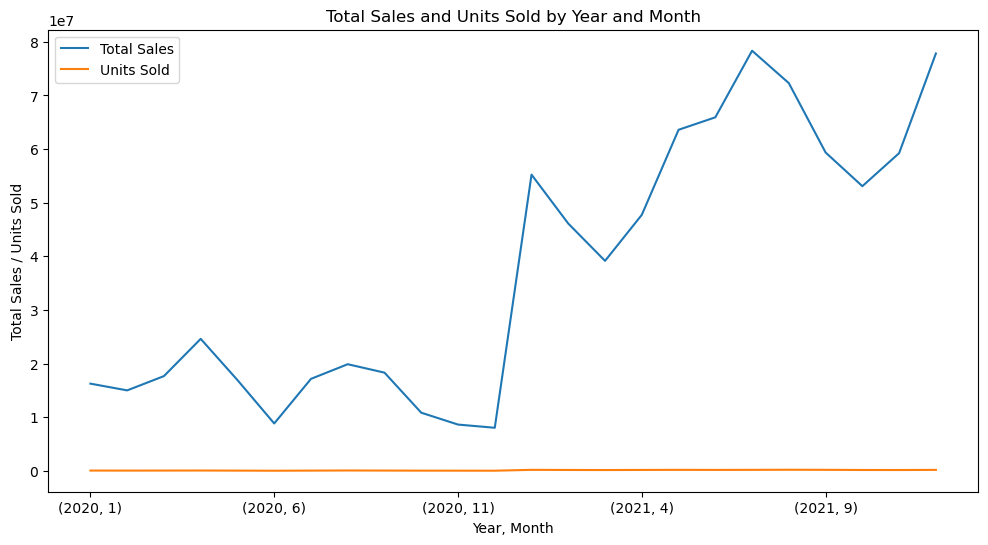

In [13]:
# Total sales and units sold on an annual and monthly basis
sales_by_year_month = df.groupby(['year', 'month'])['Total Sales'].sum()
units_by_year_month = df.groupby(['year', 'month'])['Units Sold'].sum()
plt.figure(figsize=(12, 6))
sales_by_year_month.plot(label='Total Sales')
units_by_year_month.plot(label='Units Sold')
plt.title('Total Sales and Units Sold by Year and Month')
plt.xlabel('Year, Month')
plt.ylabel('Total Sales / Units Sold')
plt.legend()

In [14]:
# Sales and units by region, state, and city
sales_by_location = df.groupby(['Region', 'State', 'City'])['Total Sales'].sum()
units_by_location = df.groupby(['Region', 'State', 'City'])['Units Sold'].sum()
print(sales_by_location,end='\n\n')
print(units_by_location)

Region     State           City          
Midwest    Illinois        Chicago            9797488.0
           Indiana         Indianapolis       8836198.0
           Iowa            Des Moines         7424011.0
           Kansas          Wichita            9972864.0
           Michigan        Detroit           18625433.0
           Minnesota       Minneapolis        7378068.0
           Missouri        St. Louis          9683265.0
           Montana         Billings          15710886.0
           Nebraska        Omaha              5929038.0
           North Dakota    Fargo              7735580.0
           Ohio            Columbus          18484583.0
           South Dakota    Sioux Falls        8495576.0
           Wisconsin       Milwaukee          7727469.0
Northeast  Connecticut     Hartford          11573448.0
           Delaware        Wilmington        12298412.0
           Maine           Portland           9195978.0
           Maryland        Baltimore          7758059.0
      

ValueError: RGBA sequence should have length 3 or 4

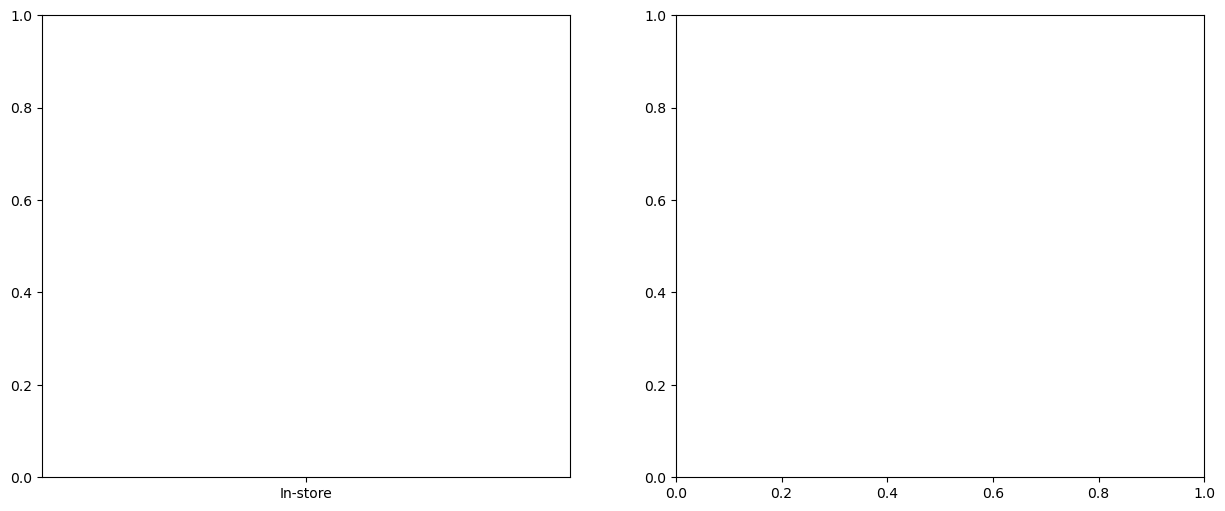

In [25]:
# Average sales and total operating profit by sales method
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors='coerce')
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'], errors='coerce')

sales_by_method = df.groupby('Sales Method')['Total Sales'].mean()
profit_by_method = df.groupby('Sales Method')['Operating Profit'].sum()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x=sales_by_method.index, y=sales_by_method.values, ax=ax[0],color=color_palette)
ax[0].set_title('Average Total Sales by Sales Method')
ax[0].set_xlabel('Sales Method')
ax[0].set_ylabel('Average Total Sales')

sns.barplot(x=profit_by_method.index, y=profit_by_method.values, ax=ax[1], color=color_palette)
ax[1].set_title('Total Operating Profit by Sales Method')
ax[1].set_xlabel('Sales Method')
ax[1].set_ylabel('Total Operating Profit')

plt.show()

<Figure size 1500x800 with 0 Axes>

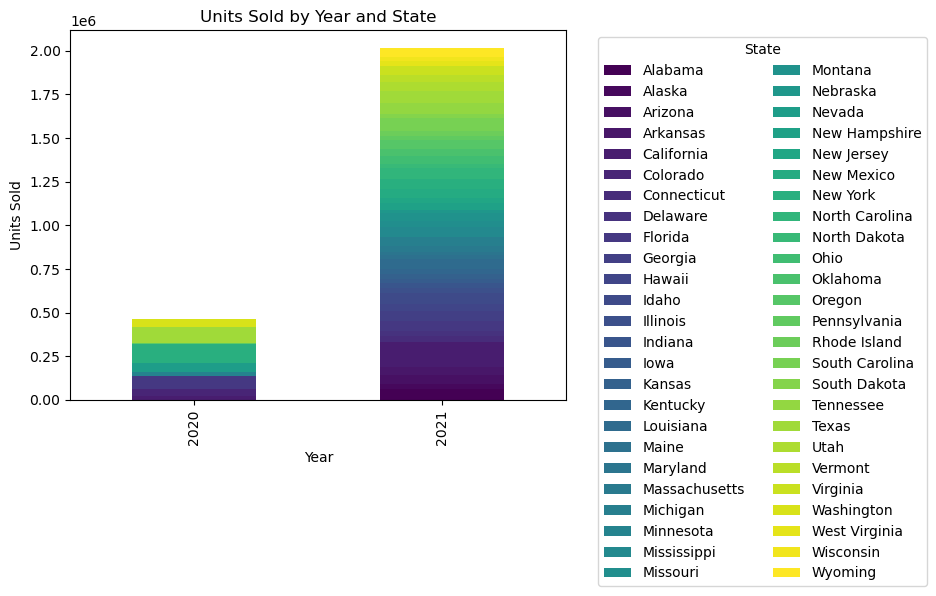

In [17]:
# Units sold by year and state
units_by_year_and_state = df.groupby(['year', 'State'])['Units Sold'].sum().reset_index()
units_by_year = units_by_year_and_state.pivot(index='year', columns='State',values='Units Sold')
plt.figure(figsize=(15, 8))
units_by_year.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Units Sold by Year and State')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()